“PENYELESAIAN PERMASALAHAN BELANJA DENGAN IMPLEMENTASI ALGORITMA ARTIFICIAL BEE COLONY PADA KNAPSACK PROBLEM”  

# Pengkodean

Pengolahan Data ke CSV, Inisialisasi Individu-Populasi & Diskritisasi (Ranking untuk TSP / Sigmoid untuk KP), Inisialisasi Parameter pada metode, Pengkodean tahap awal - generasi pertama' Pengkodean tahap kedua - metode masing masing kelompok , Pengkodean tahap ketiga - analisis dengan grafik dan eksperimen terhadap parameter.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data_Pasar.csv', encoding='cp1252', delimiter = ';')
profit = df['Harga(Rp)'] = df['Harga(Rp)'].values
weight = df['Berat(Kg)'] = df['Berat(Kg)'].values
df

,Kategori,Nama Bahan Pangan,Harga(Rp),Berat(Kg),Ketersediaan(Kg)
0,Bahan Pangan,Beras Medium Merk Rojolele,10000,1.000,20.00
1,Bahan Pangan,Beras Premium Merk Subur Jaya,13000,1.000,8.00
2,Bahan Pangan,Beras Premium Merk Dua Koki,12200,1.000,12.00
3,Bahan Pangan,Beras Premium Merk Raja Udang,11800,1.000,10.00
4,Bahan Pangan,Beras Premium Merk Mawar,11000,1.000,9.00
5,Bahan Pangan,Gula Pasir,14000,1.000,15.00
6,Bahan Pangan,Minyak Goreng Curah,10000,1.000,25.00
7,Bahan Pangan,Minyak Goreng Kemasan Sederhana,11000,1.000,20.00
8,Bahan Pangan,Minyak Goreng Kemasan Premium,20000,1.000,30.00
9,Bahan Pangan,Susu Kental Manis,10000,1.000,5.25


In [2]:
df.rename(columns = {"Berat(Kg)": "Berat", "Harga(Rp)": "Harga"}, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kategori           54 non-null     object 
 1   Nama Bahan Pangan  54 non-null     object 
 2   Harga              54 non-null     int64  
 3   Berat              54 non-null     float64
 4   Ketersediaan(Kg)   54 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [4]:
df.describe()

,Harga,Berat,Ketersediaan(Kg)
count,54.000000,54.000000,54.000000
mean,31866.666667,0.973796,24.893519
std,32702.045404,0.140763,18.575166
min,2300.000000,0.085000,4.000000
25%,11000.000000,1.000000,10.000000
50%,23000.000000,1.000000,15.000000
75%,31500.000000,1.000000,40.000000
max,120000.000000,1.000000,75.000000


In [5]:
berat = df['Berat'].values

db = [[berat[j] + berat[i] if i!=j else 0 for j in range(len(berat)) ] for i in range(len(berat))]
adj_mat_w = pd.DataFrame(db)
adj_mat_w.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [6]:
harga = df['Harga'].values

dh = [[harga[j] + harga[i] if i!=j else 0 for j in range(len(harga)) ] for i in range(len(harga))]
adj_mat_p = pd.DataFrame(dh)
adj_mat_p.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0,23000,22200,21800,21000,24000,20000,21000,30000,20000,...,18000,15000,18000,13000,22000,38000,34000,22000,18000,17000
1,23000,0,25200,24800,24000,27000,23000,24000,33000,23000,...,21000,18000,21000,16000,25000,41000,37000,25000,21000,20000
2,22200,25200,0,24000,23200,26200,22200,23200,32200,22200,...,20200,17200,20200,15200,24200,40200,36200,24200,20200,19200
3,21800,24800,24000,0,22800,25800,21800,22800,31800,21800,...,19800,16800,19800,14800,23800,39800,35800,23800,19800,18800
4,21000,24000,23200,22800,0,25000,21000,22000,31000,21000,...,19000,16000,19000,14000,23000,39000,35000,23000,19000,18000


Inisialisasi

In [7]:
import numpy as np
import random
#parameter
n_bee = 30
bee_harga = len(harga)
bee_berat = len(berat)
look_for = 1

In [8]:
# berat

waggle_dance_weights = np.ones(shape=(bee_berat,bee_berat)) * look_for
np.fill_diagonal(waggle_dance_weights,0)

waggle_dance_berat = pd.DataFrame(waggle_dance_weights)
waggle_dance_berat.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# harga

waggle_dance_profits = np.ones(shape=(bee_harga,bee_harga)) * look_for
np.fill_diagonal(waggle_dance_profits,0)

waggle_dance_harga = pd.DataFrame(waggle_dance_profits)
waggle_dance_harga.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
def sigmoid(x):
    return 1/(np.exp(-x)+1)

In [11]:
X = np.random.uniform(-4,4,(n_bee, bee_harga))
X

array([[-2.69461346,  3.10532745, -1.65413558, ...,  0.03605178,
        -2.46822198, -0.91842386],
       [-3.51154236, -1.67648778, -3.34233092, ..., -1.05944356,
         0.69298793,  3.78731074],
       [-2.05620641, -2.2680277 , -1.71124173, ...,  1.8220168 ,
         2.49035177, -1.15658598],
       ...,
       [ 0.99697268, -1.8427465 , -3.30492578, ..., -2.8076878 ,
         3.17754332, -1.29205754],
       [-3.56618969, -0.32898294, -1.3869291 , ...,  1.25770492,
        -0.88060485,  1.5072932 ],
       [ 0.10563131, -2.4765617 , -2.35046203, ...,  1.57658346,
        -2.74226478,  1.73946641]])

In [12]:
sigmoid(X)

array([[0.06329195, 0.95711196, 0.1605508 , ..., 0.50901197, 0.07811618,
        0.28527915],
       [0.02898559, 0.1575611 , 0.0341472 , ..., 0.25741581, 0.66663128,
        0.97784549],
       [0.11342676, 0.09380574, 0.15300273, ..., 0.86080795, 0.92346267,
        0.23928818],
       ...,
       [0.73046295, 0.13672679, 0.03540259, ..., 0.05691015, 0.95998039,
        0.21550475],
       [0.02748648, 0.41848811, 0.19989846, ..., 0.77863077, 0.29305246,
        0.81865971],
       [0.5263833 , 0.07751771, 0.08702905, ..., 0.82872011, 0.060525  ,
        0.85061928]])

In [13]:
klasifikasi = np.vectorize(lambda x: round(x))
klasifikasi(sigmoid(X))

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1]])

In [14]:
#misal untuk partikel ke-2
d_partikel = klasifikasi(sigmoid(X))
d_partikel

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1]])

In [15]:
# Inisialisasi Individu-Populasi & Diskritisasi
gen_individu = lambda n_individu,n_barang,a,b: np.random.uniform(a,b,(n_individu,n_barang))

# Fungsi Konstrain
def f_constrain(X,df,lim):
    return np.sum( X * df['Berat'].values ) <= lim

def f_profit(X,df):
    return np.sum(X * df['Harga'].values)

def f_obj(X,df,lim):
    return f_profit(X,df) if f_constrain(X,df,lim) else 0

def diskritisasi(bees):
    return np.round( 1/ ( 1 + np.exp(-1 * bees) ) )

def calculate_fitness(bees,df,p):
    d_bees = diskritisasi(bees)
    fitness = np.array( list(map( lambda x:f_obj(x,df,p['lim']) , d_bees )) )
    fitness = fitness.reshape( (-1,1) )
    return fitness

def sort_individu(fitness):
    return np.argsort(fitness)[::-1] #bees_with_f[bees_with_f[:,-1].argsort()[::-1]]

def solusi(bees_w_f):
    df_barang = pd.DataFrame(diskritisasi(bees_w_f[:,:-1]))
    cols = [ 'Nama Bahan Pangan' + str(i+1) for i in range( df_barang.shape[1]) ]
    df_barang.columns = cols
    df_barang['Harga'] = bees_w_f[:,-1].reshape(-1,1)
    return df_barang

def generate_tipe_bee(presentase,bees):
    proporsi = np.array(presentase) * bees.shape[0]
    proporsi[-1] = bees.shape[0] - ( np.sum(proporsi) - proporsi[-1] )
    return np.concatenate( [ np.repeat( i , round(p) ) for i,p in enumerate(proporsi) ] )

def scout_movement(scout,a,b):
    return scout + np.random.uniform(a,b,size=scout.shape)

def employed_movement(employed,alpha):
    return employed + np.random.uniform(0,1,size=employed.shape) * alpha

def waggle_dance(bees,tipe,fitness):
    df = pd.DataFrame( np.concatenate( (bees,tipe.reshape((-1,1)),fitness),axis=1 ) )
    employed = df[ df.iloc[:,-2] == 0 ]
    p = employed.iloc[:,-1]
    if p.sum() == 0:
      p = p + 1
    return employed.sample(n=1,weights=p).iloc[:,:-2].values

def onlooker_movement(onlooker,beta,bees,tipe,fitness):
    term1 = np.random.uniform() * ( onlooker - waggle_dance(bees,tipe,fitness) )
    term2 = beta * np.random.uniform(size=onlooker.shape)
    return onlooker + term1 + term2

def get_bee_by_type(df,x):
    return df[df[df.columns[-2]] == x].iloc[:,:-2].values

def movement(bees,tipe,fitness,params):
    df = pd.DataFrame(np.concatenate((bees,tipe.reshape((-1,1)),fitness),axis=1))
    employed = employed_movement( get_bee_by_type(df,0), params['alpha'])
    onlooker = onlooker_movement( get_bee_by_type(df,1),params['beta'],bees,tipe,fitness )
    scouts = scout_movement( get_bee_by_type(df,2),params['a'] , params['b'] )
    new_bee = np.concatenate( (employed,onlooker,scouts) )
    return new_bee

def seleksi(bees,tipe,fitness,params):
    idxs = sort_individu(fitness.flatten())
    return bees[idxs] , tipe , fitness[idxs]

## Inisialisasi Parameter pada metode

def inisialisasi(params,df):
    return gen_individu(int(params['n_individu']),int(params['n_barang']),params['a'],params['b'])

def ABC(params,df):
  
    generasi = 0
    bees = inisialisasi(params,df)
    tipe = generate_tipe_bee(params['presentase'],bees)
    fitness = calculate_fitness(bees,df,params)
    
    while generasi<params['max_generasi']:
      
   
      bees = movement(bees,tipe,fitness,params)
      fitness = calculate_fitness(bees,df,params)
      bees , tipe , fitness = seleksi(bees,tipe,fitness,params)
      generasi = generasi+1
      
      return solusi(np.concatenate((bees,fitness),axis=1))
      
def run_BCO(dfparams,df):
    temp = []
    for i in range( dfparams.shape[0]):
        prm = dfparams.iloc[i].to_dict()
        prm['presentase'] = prm['presentase'].split('|')
        for j in range(0, len(prm['presentase'])):
            prm['presentase'][j] = float(prm['presentase'][j])
        temp.append(ABC(prm,df))
    return temp


def save_BCO(hasils):
  for h in enumerate(hasils):pd.DataFrame(h[1]).to_csv('hasil_BCO' + str(h[0]) + '.csv')

In [16]:
# TIPE BEE
# 0 = Employed , 1 = Onlooker , 2 = Scout
params = {
    "n_individu":100,
    "n_barang":54,
    "a":-1,
    "b":1,
    "alpha": 1, # ukuran exploitasi employed
    "beta":1, # kecepatan onlooker mendekati employed
    "max_generasi":50,
    "presentase": [0.20,0.25,0.55],
    "lim" : 15
}

In [18]:
ABC_params_KP = pd.DataFrame(params)
ABC_params_KP.to_csv('ABC_params_KP.csv', encoding='utf-8')

In [28]:
# Main Program
dfparamss = pd.read_csv('ABC_params_KP.csv')
dfparamss['n_individu'] = 100
dfparamss['lim'] = 25 # batasan 
dfparamss['a'] = -5
dfparamss['b'] = 5

dfparamss = dfparamss.drop('Unnamed: 0', axis='columns')
dfparamss['presentase'] = '0.20|0.25|0.55'

dfparamss

,n_individu,n_barang,a,b,alpha,beta,max_generasi,presentase,lim
0,100,54,-5,5,1,1,50,0.20|0.25|0.55,25
1,100,54,-5,5,1,1,50,0.20|0.25|0.55,25
2,100,54,-5,5,1,1,50,0.20|0.25|0.55,25


In [33]:
ABC_paramsdict_KP = pd.DataFrame(dfparamsdict)
ABC_paramsdict_KP

,n_individu,n_barang,a,b,alpha,beta,max_generasi,presentase,lim
0,25,54,-1,1,1,1,50,0.20|0.25|0.55,15
1,25,54,-1,1,1,1,50,0.20|0.25|0.55,15
2,25,54,-1,1,1,1,50,0.20|0.25|0.55,15


# Analisis
analisis berkali-kali (Mencari solusi terbaik)

Mencari Profit tertinggi berdasarkan nilai limit dan jumlah individu (n_indvidu)

solusi untuk mengkategorikan atau menentukan jenis-jenis alpukat unggulan yang memiliki profit atau keuntungan, sehingga dapat diketahui jenis alpukat mana yang paling sedikit hingga yang paling banyak memberi keuntungan.

In [1227]:
def save_BCO(hasils):
  for h in enumerate(hasils):
    pd.DataFrame(h[1]).to_csv('./hasilrevisi/percobaan12_' + str(h[0]) + '.csv')

In [1192]:
# Main Program

individu_1 = 100
individu_2 = 200
individu_3 = 300
individu_4 = 400
alpha_1 = 2
alpha_2 = 4
alpha_3 = 6
alpha_4 = 8
alpha_5 = 10
beta_1  = 2
beta_2  = 4
beta_3  = 6
beta_4  = 8
beta_5  = 10
presentase_1 = '0.10|0.35|0.55'
presentase_2 = '0.35|0.55|0.10'
presentase_3 = '0.55|0.10|0.35'
max_generasi_1 = 50
max_generasi_2 = 100
max_generasi_3 = 150
max_generasi_4 = 200

def main_program(individu, alpha, beta, presentase, max_generasi ):
    dfparamss = pd.read_csv('ABC_params_KP.csv')
    dfparamss['n_individu'] = individu 
    dfparamss['alpha'] = alpha
    dfparamss['beta'] = beta
    dfparamss['max_generasi'] = max_generasi

    dfparamss = dfparamss.drop('Unnamed: 0', axis='columns')
    dfparamss['presentase'] = presentase

    return dfparamss

dfparamsdict = main_program( individu_4, alpha_1, beta_1, presentase_1, max_generasi_3 )

In [1193]:
ABC_paramsdict_KP = pd.DataFrame(dfparamsdict)
ABC_paramsdict_KP

,n_individu,n_barang,a,b,alpha,beta,max_generasi,presentase,lim
0,400,54,-1,1,2,2,150,0.10|0.35|0.55,15
1,400,54,-1,1,2,2,150,0.10|0.35|0.55,15
2,400,54,-1,1,2,2,150,0.10|0.35|0.55,15


In [1216]:
h1 = hasil1[0][hasil1[0]['Harga']>0]
h1['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1217]:
h1 = hasil1[1][hasil1[1]['Harga']>0]
h1['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1218]:
h1 = hasil1[2][hasil1[2]['Harga']>0]
h1['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1219]:
hasil2 = run_BCO(ABC_paramsdict_KP ,df)

In [1220]:
h2 = hasil2[0][hasil2[0]['Harga']>0]
h2['Harga'].head(1)

0    588500.0
Name: Harga, dtype: float64

In [1221]:
h2 = hasil2[1][hasil2[1]['Harga']>0]
h2['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1222]:
h2 = hasil2[2][hasil2[2]['Harga']>0]
h2['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1223]:
hasil3 = run_BCO(ABC_paramsdict_KP ,df)

In [1224]:
h3 = hasil3[0][hasil3[0]['Harga']>0]
h3['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1225]:
h3 = hasil3[1][hasil3[1]['Harga']>0]
h3['Harga'].head(1)

Series([], Name: Harga, dtype: float64)

In [1226]:
h3 = hasil3[2][hasil3[2]['Harga']>0]
h3['Harga'].head(1)

0    445500.0
Name: Harga, dtype: float64

In [1228]:
save_BCO(hasil2)

# Visulalisasi

- Percobaan 1

In [1229]:
df1 = pd.read_csv('./hasilrevisi/percobaan1_1.csv')
df1 = df1.drop(['Unnamed: 0'], 1)
df1 = df1[df1['Harga']>0].tail().loc[0]
df1

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/3639939078.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          1.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          1.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          1.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         1.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         1.0
Nama Bah

In [1230]:
idx_d = df1.apply( lambda x: x==1)
idx_d

Nama Bahan Pangan1     False
Nama Bahan Pangan2      True
Nama Bahan Pangan3     False
Nama Bahan Pangan4      True
Nama Bahan Pangan5     False
Nama Bahan Pangan6     False
Nama Bahan Pangan7     False
Nama Bahan Pangan8     False
Nama Bahan Pangan9      True
Nama Bahan Pangan10    False
Nama Bahan Pangan11    False
Nama Bahan Pangan12     True
Nama Bahan Pangan13    False
Nama Bahan Pangan14     True
Nama Bahan Pangan15    False
Nama Bahan Pangan16     True
Nama Bahan Pangan17     True
Nama Bahan Pangan18    False
Nama Bahan Pangan19    False
Nama Bahan Pangan20    False
Nama Bahan Pangan21    False
Nama Bahan Pangan22     True
Nama Bahan Pangan23    False
Nama Bahan Pangan24    False
Nama Bahan Pangan25    False
Nama Bahan Pangan26    False
Nama Bahan Pangan27    False
Nama Bahan Pangan28    False
Nama Bahan Pangan29    False
Nama Bahan Pangan30    False
Nama Bahan Pangan31     True
Nama Bahan Pangan32    False
Nama Bahan Pangan33    False
Nama Bahan Pangan34    False
Nama Bahan Pan

In [1231]:
dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     7
Ikan             5
Sayur            2
Daging           1
Rempah-Rempah    1
Name: Kategori, dtype: int64

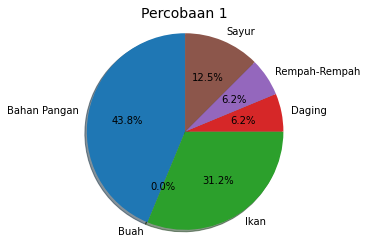

In [1236]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [7,0,5,1,1,2]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 1', fontsize=14)
plt.show()

- Percobaan 2

In [1237]:
df2 = pd.read_csv('./hasilrevisi/percobaan2_0.csv')
df2 = df2.drop(['Unnamed: 0'], 1)
df2 = df2[df2['Harga']>0].tail().loc[0]
df2

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/4019564728.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          1.0
Nama Bahan Pangan7          1.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         1.0
Nama Bahan Pangan12         0.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         1.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         1.0
Nama Bahan Pangan22         0.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         1.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1239]:
idx_d = df2.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     5
Ikan             4
Daging           2
Rempah-Rempah    2
Sayur            1
Name: Kategori, dtype: int64

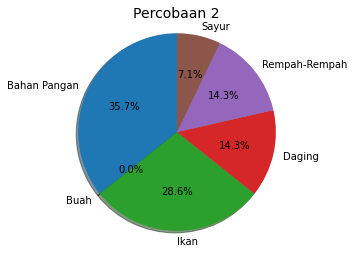

In [1240]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [5,0,4,2,2,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 2', fontsize=14)
plt.show()

- Percobaan 3

In [1248]:
df3 = pd.read_csv('./hasilrevisi/percobaan3_2.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/1988439733.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          1.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          1.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         0.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         0.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         1.0
Nama Bahan Pangan19         1.0
Nama Bahan Pangan20         1.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         1.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1249]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Daging           4
Bahan Pangan     3
Ikan             3
Rempah-Rempah    2
Sayur            2
Buah             1
Name: Kategori, dtype: int64

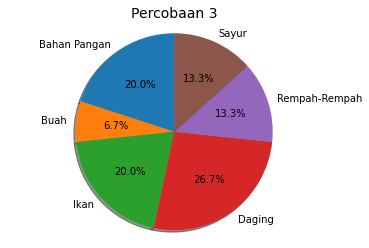

In [1250]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [3,1,3,4,2,2]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 3', fontsize=14)
plt.show()

- Percobaan 4

In [1251]:
df3 = pd.read_csv('./hasilrevisi/percobaan4_2.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/2409974954.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         1.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         1.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         0.0
Nama Bahan Pangan17         0.0
Nama Bahan Pangan18         1.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         1.0
Nama Bahan Pangan21         1.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         1.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         1.0
Nama Bahan Pangan31         1.0
Nama Bah

In [1252]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Daging           4
Bahan Pangan     3
Rempah-Rempah    3
Ikan             3
Sayur            1
Name: Kategori, dtype: int64

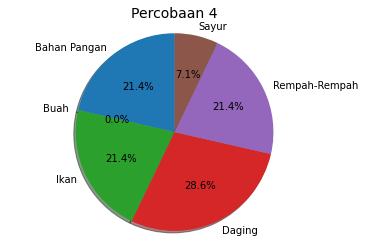

In [1253]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [3,0,3,4,3,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 4', fontsize=14)
plt.show()

- Percobaan 5

In [1254]:
df3 = pd.read_csv('./hasilrevisi/percobaan5_1.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/246261343.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          1.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         1.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         0.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         0.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         0.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         1.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         1.0
Nama Bahan Pangan27         1.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         1.0
Nama Bahan Pangan30         1.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1255]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Rempah-Rempah    5
Bahan Pangan     3
Ikan             3
Daging           1
Sayur            1
Buah             1
Name: Kategori, dtype: int64

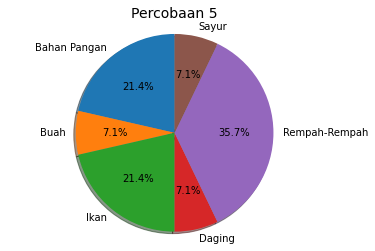

In [1256]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [3,1,3,1,5,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 5', fontsize=14)
plt.show()

- Percobaan 6

In [1257]:
df3 = pd.read_csv('./hasilrevisi/percobaan6_0.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/1569131009.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          1.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          1.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          1.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          1.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         1.0
Nama Bahan Pangan15         1.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         0.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         1.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         1.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1258]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     9
Rempah-Rempah    3
Ikan             2
Sayur            1
Buah             1
Name: Kategori, dtype: int64

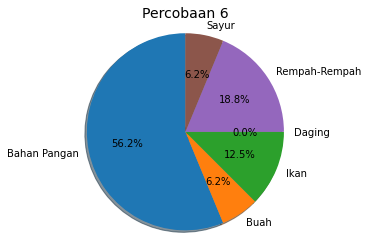

In [1259]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [9,1,2,0,3,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 6', fontsize=14)
plt.show()

- Percobaan 7

In [1260]:
df3 = pd.read_csv('./hasilrevisi/percobaan7_1.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/2387578282.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          1.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          1.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         1.0
Nama Bahan Pangan14         1.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         0.0
Nama Bahan Pangan17         0.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         1.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         1.0
Nama Bahan Pangan27         1.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1261]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     5
Ikan             5
Rempah-Rempah    3
Daging           2
Name: Kategori, dtype: int64

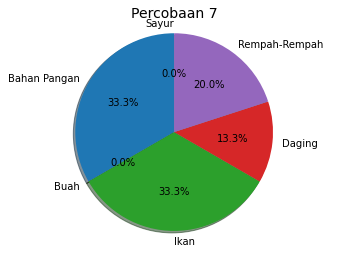

In [1262]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [5,0,5,2,3,0]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 7', fontsize=14)
plt.show()

- Percobaan 8

In [1263]:
df3 = pd.read_csv('./hasilrevisi/percobaan8_2.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/2740435734.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          1.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         1.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         0.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         1.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         0.0
Nama Bahan Pangan18         1.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         1.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         1.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         1.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         1.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         1.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1264]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Daging           5
Bahan Pangan     4
Rempah-Rempah    2
Sayur            2
Buah             2
Name: Kategori, dtype: int64

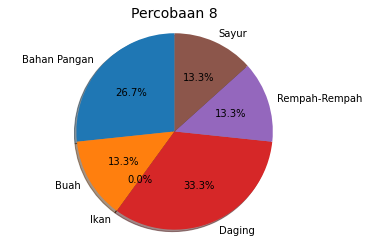

In [1266]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [4,2,0,5,2,2]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 8', fontsize=14)
plt.show()

- Percobaan 9

In [1268]:
df3 = pd.read_csv('./hasilrevisi/percobaan9_1.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/1491180791.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          1.0
Nama Bahan Pangan3          1.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         0.0
Nama Bahan Pangan13         1.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         0.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         1.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         1.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1269]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan    4
Daging          3
Ikan            3
Sayur           3
Name: Kategori, dtype: int64

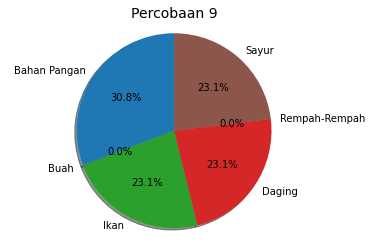

In [1270]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [4,0,3,3,0,3]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 9', fontsize=14)
plt.show()

- Percobaan 10

In [1272]:
df3 = pd.read_csv('./hasilrevisi/percobaan10_0.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/1095776601.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          1.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          1.0
Nama Bahan Pangan6          1.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         1.0
Nama Bahan Pangan14         1.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         1.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         1.0
Nama Bahan Pangan22         0.0
Nama Bahan Pangan23         1.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         1.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1273]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     8
Daging           4
Ikan             3
Rempah-Rempah    1
Name: Kategori, dtype: int64

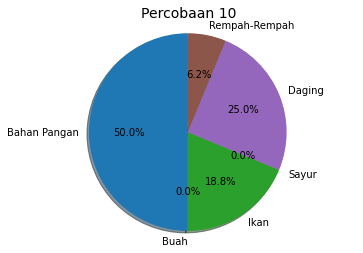

In [1276]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Sayur', 'Daging', 'Rempah-Rempah']
percents = [8,0,3,0,4,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 10', fontsize=14)
plt.show()

- Percobaan 11

In [1277]:
df3 = pd.read_csv('./hasilrevisi/percobaan11_1.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/1956662302.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          0.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         1.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         1.0
Nama Bahan Pangan16         0.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         1.0
Nama Bahan Pangan20         0.0
Nama Bahan Pangan21         1.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         1.0
Nama Bahan Pangan27         0.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1278]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     4
Ikan             4
Daging           3
Rempah-Rempah    2
Sayur            1
Buah             1
Name: Kategori, dtype: int64

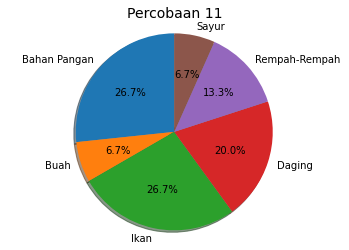

In [1280]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [4,1,4,3,2,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 11', fontsize=14)
plt.show()

- Percobaan 12

In [1281]:
df3 = pd.read_csv('./hasilrevisi/percobaan12_0.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/2262067167.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          1.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          0.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          1.0
Nama Bahan Pangan7          0.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          1.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         1.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         0.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         1.0
Nama Bahan Pangan17         0.0
Nama Bahan Pangan18         1.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         1.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         0.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         0.0
Nama Bahan Pangan27         1.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1282]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     5
Daging           3
Rempah-Rempah    2
Ikan             2
Buah             2
Name: Kategori, dtype: int64

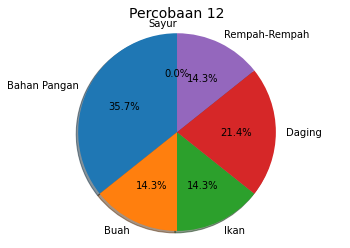

In [1284]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [5,2,2,3,2,0]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 12', fontsize=14)
plt.show()

- Percobaan 13

In [1285]:
df3 = pd.read_csv('./hasilrevisi/percobaan13_1.csv')
df3 = df3.drop(['Unnamed: 0'], 1)
df3 = df3[df3['Harga']>0].tail().loc[0]
df3

C:\Users\micha\AppData\Local\Temp/ipykernel_30232/1964513203.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df3.drop(['Unnamed: 0'], 1)


Nama Bahan Pangan1          0.0
Nama Bahan Pangan2          0.0
Nama Bahan Pangan3          0.0
Nama Bahan Pangan4          1.0
Nama Bahan Pangan5          0.0
Nama Bahan Pangan6          0.0
Nama Bahan Pangan7          1.0
Nama Bahan Pangan8          0.0
Nama Bahan Pangan9          1.0
Nama Bahan Pangan10         0.0
Nama Bahan Pangan11         0.0
Nama Bahan Pangan12         0.0
Nama Bahan Pangan13         0.0
Nama Bahan Pangan14         1.0
Nama Bahan Pangan15         0.0
Nama Bahan Pangan16         0.0
Nama Bahan Pangan17         1.0
Nama Bahan Pangan18         0.0
Nama Bahan Pangan19         0.0
Nama Bahan Pangan20         1.0
Nama Bahan Pangan21         0.0
Nama Bahan Pangan22         1.0
Nama Bahan Pangan23         0.0
Nama Bahan Pangan24         1.0
Nama Bahan Pangan25         0.0
Nama Bahan Pangan26         1.0
Nama Bahan Pangan27         1.0
Nama Bahan Pangan28         0.0
Nama Bahan Pangan29         0.0
Nama Bahan Pangan30         0.0
Nama Bahan Pangan31         0.0
Nama Bah

In [1286]:
idx_d = df3.apply( lambda x: x==1)
idx_d

dfres = df[idx_d[:-1].values]
dfres['Kategori'].value_counts()

Bahan Pangan     5
Daging           3
Rempah-Rempah    3
Ikan             2
Buah             2
Sayur            1
Name: Kategori, dtype: int64

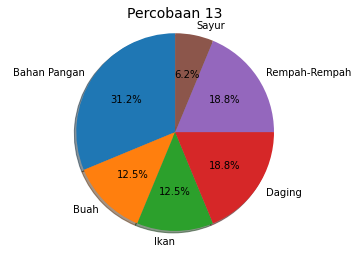

In [1288]:
labels = ['Bahan Pangan', 'Buah', 'Ikan', 'Daging', 'Rempah-Rempah', 'Sayur']
percents = [5,2,2,3,3,1]

explode = (0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Percobaan 13', fontsize=14)
plt.show()